In [1]:
from google.colab import drive
drive.mount('/content/gdrive')  # mount Google Drive ke Colab

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/praktikum_ml/Pertemuan-5"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
df = pd.read_csv(path + '/data/stunting_wasting_dataset.csv')
df.head()


,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [10]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [11]:
df.duplicated().sum()

np.int64(7308)

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df = df.rename(columns={
'Jenis Kelamin':'jenis_kelamin',
 'Umur (bulan)':'_Bulan',
 'Tinggi Badan (cm)':'tinggi_cm',
 'Berat Badan (Kg)':'berat_kg',
 'Stunting':'stunting',
 'Wasting':'wasting'
})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   jenis_kelamin     92692 non-null  object 
 1   _Bulan            92692 non-null  int64  
 2   tinggi_cm         92692 non-null  float64
 3   Berat Badan (kg)  92692 non-null  float64
 4   stunting          92692 non-null  object 
 5   wasting           92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

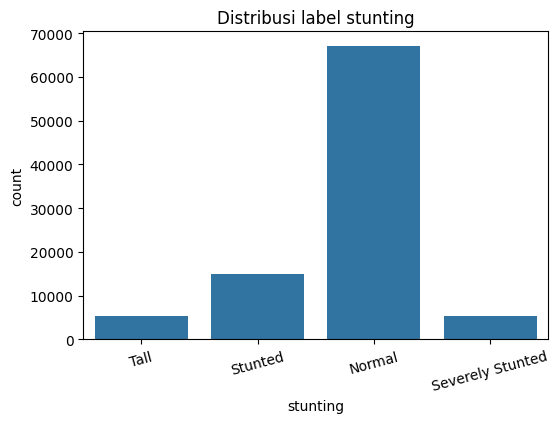

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label stunting')
plt.xticks(rotation=15)
plt.show()


In [18]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)   # urutan kelas
df['stunting'] = stunting_cat.cat.codes                # y numerik

# fitur kategorikal lain (jenis_kelamin, wasting) -> kode juga
for col in ['jenis_kelamin', 'wasting']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,_Bulan,tinggi_cm,Berat Badan (kg),stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


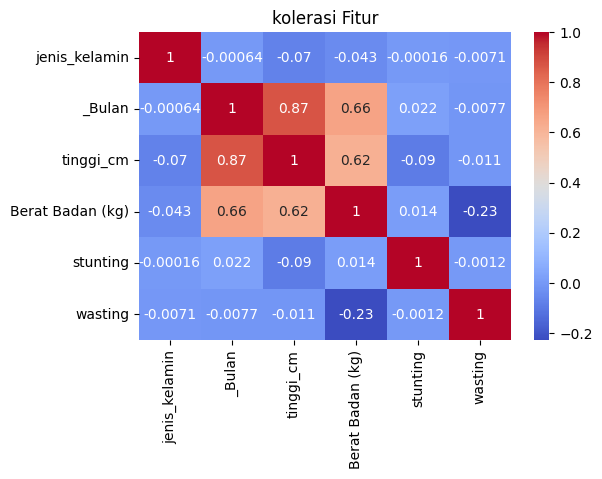

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('kolerasi Fitur')
plt.show()